In [ ]:
# Making a change (3/22)

In [1]:
# Function that does n iterations of RMS calculation

import numpy as np
import matplotlib.pyplot as plt

def mc_rms (y_array1, y_array2, unc1, unc2, n):
    """Does n iterations of RMS calculation.
    
    Arguments: y_array1, y_array2, unc1, unc2, n
    Outputs: avg, error, RMS"""
    
    plt.clf()
    
    RMS = []
    
    for w in range(n):
        y_array1_rand = y_array1 + (np.random.randn(len(y_array1)) * unc1)
        y_array2_rand = y_array2 + (np.random.randn(len(y_array2)) * unc2)
        diff = y_array1_rand - y_array2_rand
        rms = (np.sum(diff**2))/(len(diff))**(0.5)
        RMS.append(rms)
       
    avg = np.mean(RMS)
    error = np.std(RMS)
#     print('RMS = ',avg, '+/-', error)
#     print(avg)
    return avg, error, RMS
    
    RMS.sort()
#     plt.hist(RMS, bins=50)
#     plt.ylabel('Frequency')
#     plt.xlabel('RMS')
#     plt.show()

#     label = '/Users/victoriaditomasso/phys767/MCSpectra/hist_'+str(plot_title)+'.png'

#     plt.savefig(label)
    
#     print(RMS)

In [2]:
def snr_to_unc(unc_array):
    """Checks if an array is SNR or unc, converts an SNR array into an uncertainty array.
    
    Arguments: unc_array
    Outputs: unc"""

    unc=np.asarray(unc_array)
    avg_unc = np.sum(unc)/len(unc)
    if avg_unc > 4.0:
        unc = 1.0/unc
        
    return unc

In [26]:
# Probably not general enough to be its own function
def get_tar_data(tar_source_id, spec_order):

    """Queries database for wavelength, flux, uncertainty and RV for a given source_id & spectral order
    
    Arguments: tar_source_id, spec_order
    Outputs: w_tar,f_tar,rv_tar,unc_tar"""
    
    data_tar = db.query("select sources.id, sources.shortname, spectra.wavelength, spectra.flux, spectra.unc, radial_velocities.radial_velocity from sources join spectra on sources.id=spectra.source_id join radial_velocities on spectra.source_id=radial_velocities.source_id where spectra.source_id={} and spectra.wavelength_order={}".format(tar_source_id, spec_order))

    w_tar = np.asarray(data_tar[0][2])
    
    f_tar = np.asarray(data_tar[0][3])
    
    rv_tar = data_tar[0][5]
    
    unc_tar = data_tar[0][4]
    
    unc_tar = snr_to_unc(unc_tar)
    
    return w_tar,f_tar,rv_tar,unc_tar

In [27]:
# Probably not general enough to be its own function
def get_comp_data(spec_id) :
    
    """Queries database for wavelength, flux, uncertainty and RV for a given spectrum ID
    
    Arguments: spec_id
    Outputs: w_comp,f_comp,rv_comp,unc_comp"""
    
    data_comp = db.query("select spectra.wavelength, spectra.flux, spectra.unc from spectra where spectra.id={}".format(row['spec_id']))
    
    w_comp = np.asarray(data_comp[0][0])
    
    f_comp = np.asarray(data_comp[0][1])
    
    rv_comp = row['rv']
    
    unc_comp = data_comp[0][2]
    
    unc_comp = snr_to_unc(unc_comp)
    
    return w_comp,f_comp,rv_comp,unc_comp

In [5]:
# I'm leaving this as a function even though it's only one line anyway
def rv_shift(wavelength, rv):
    
    """Shifts a spectrum based on its radial velocity
    
    Arguments: wavelength array, rv
    Outputs: shifted_wavelength"""
    
    shifted_wavelength = (wavelength) * (1.-(rv/2.99792458e5))

    return shifted_wavelength

In [6]:
# I don't think I need to write this, because there's already an interpolate function
# def interpolate_spectra(w_tar,w_comp,f_comp,unc_comp):
    
#     x = w_tar
#     xp = w_comp
#     fp = f_comp
#     f_comp_interp = np.interp(x, xp, fp)
        
#     w = w_tar
#     wp = w_comp
#     up = unc_comp
#     unc_comp_interp = np.interp(w, wp, up)
    
#     return [f_comp_interp, unc_comp_interp]

In [7]:
def normalize_spectra(f1,unc1,f2,unc2):
    
    """Normalized one spectrum to another
    
    Arguments: f1,unc1,f2,unc2
    Outputs: f2_norm"""
    
# Finds a normalization coefficient
    norm_coeff = sum((f1 * f2)/((unc1)**2 + (unc2)**2))/sum((f2 * f2)/((unc1)**2 + (unc2)**2))

# Creates an array of normalized flux for the comparison object
    f2_norm = f2 * norm_coeff
    
    return f2_norm

In [8]:
# def align_spectra(w1,f1,unc1,w2,f2,unc2,rv1=0,rv2=0):
    
#     """Shifts 2 spectra to each other for comparison (changes SNR arrays to uncertainties, RV shifts, interpolates, normalized)
    
#     Arguments: w1,f1,unc1,w2,f2,unc2,rv1=0,rv2=0
#     Outputs: w1,w2,f2,unc2"""
    
# # Will convert an SNR array to an uncertainty array
#     unc2 = snr_to_unc(unc2)

# # Shifts spectra based on their RVs
# shifted_wavelength = (wavelength) * (1.-(rv/2.99792458e5))
#     w1 = rv_shift(w1, rv1)
#     w2 = rv_shift(w2, rv2)

# # Interpolates comparison spectrum and comparison unc
# # Remember: once you interpolate, you need to plot the w_tar vs the interpolated flux NOT w_comp vs interpolated flux
#     f2 = np.interp(w1, w2, f2)
#     unc2 = np.interp(w1, w2, unc2)
        
#     f2 = normalize_spectra(f1,unc1,f2,unc2)
        
#     return w1,w2,f2,unc2

In [9]:
import numpy as np
import matplotlib.mlab as mlab

def mc_output_hist(MC_calculations,bins=25):

            
        plt.hist(MC_calculations,bins,normed=True)
            
        mean = np.mean(MC_calculations)
        variance = np.var(MC_calculations)
        sigma = np.sqrt(variance)
        x_hist = np.linspace(min(MC_calculations), max(MC_calculations))
        plt.plot(x, mlab.normpdf(x, mean, sigma))
        
        avg = np.mean(MC_calculations)
        error = np.std(MC_calculations)
        y_gauss = mlab.normpdf(25,avg,error)
        x_gauss = np.linspace(min(MC_calculations),max(MC_calculations),num=len(y_gauss))
        fig = plt.plot(x_gauss,y_gauss)
        
        print('mean = ', mean, 'sigma = ', sigma)
        return fig

In [12]:
# Derived from ycfq_auto:

#yfcq_auto
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.interpolate import interp1d
# import BDdb
import astrodb
import pandas as pd
%matplotlib inline
import matplotlib.mlab as mlab
from scipy.stats import norm

db = astrodb.Database('/Users/victoriaditomasso/Desktop/BDNYCdeprecated.db')

# The inputs are the target source id, the spec order being compared and the path to the text file with the comparison sample (has to be tab delimited)
def yfcq(tar_source_id, spec_order, path_to_comp_sample_dataframe):

# This clears the figure, useful when saving the plots
    plt.clf()

# Queries the database for target data
    data_tar = db.query("select sources.id, sources.shortname, spectra.wavelength, spectra.flux, spectra.unc, radial_velocities.radial_velocity from sources join spectra on sources.id=spectra.source_id join radial_velocities on spectra.source_id=radial_velocities.source_id where spectra.source_id={} and spectra.wavelength_order={}".format(tar_source_id, spec_order))

# Separates the target data into separate variables (wavelength, flux, RV, uncertainty)
    w_tar = np.asarray(data_tar[0][2])
    f_tar = np.asarray(data_tar[0][3])
    rv_tar = data_tar[0][5]
    unc_tar = data_tar[0][4]

# Adjusting wavelength array of the target according to its RV
    w_tar = w_tar * (1.-(rv_tar/2.99792458e5))
    
# Reads in the dataframe
    df=pd.read_csv(path_to_comp_sample_dataframe,sep='\t')

# Empty lists to be populated in the forloop
    RMSs=[]
    sigmas=[]
    
# Sets the first and last flux point that will be used in quantification calculation/will be plotted
    f=50
    l=1000
    
# Iterates through all of the comparison objects in the dataframe
    for i, row in df.iterrows() :

        plt.clf()
        
# Queries the database for comparison object data
        data_comp = db.query("select spectra.wavelength, spectra.flux, spectra.unc from spectra where spectra.id={}".format(row['spec_id']))

# Separates the comparison data into separate variables (wavelength, flux, RV, uncertainty)
        w_comp = np.asarray(data_comp[0][0])
        f_comp = np.asarray(data_comp[0][1])
        rv_comp = row['rv']
        unc_comp = data_comp[0][2]
    
# Will convert an SNR array to an uncertainty array
        unc_comp = snr_to_unc(unc_comp)
    
# Shifts spectra based on their RVs
        w_comp = w_comp * (1.-(rv_comp/2.99792458e5))
    
# Interpolates comparison spectrum and comparison unc
# Remember: once you interpolate, you need to plot the w_tar vs the interpolated flux NOT w_comp vs interpolated flux
        f_comp = np.interp(w_tar, w_comp, f_comp)
        unc_comp = np.interp(w_tar, w_comp, unc_comp)
    
# Normalizes the comparison spectrum to the target spectrum
        f_comp = normalize_spectra(f_tar,unc_tar,f_comp,unc_comp)
    
# MC RMS calculation
        y_array1 = f_tar[f:l]
        y_array2 = f_comp[f:l]
        unc1 = unc_tar[f:l]
        unc2 = unc_comp[f:l]
    
        iterations = 1000
        avg, error, RMS = mc_rms(y_array1, y_array2, unc1, unc2, iterations)
    
# Appends the average RMS and the error for each comp spectrum to master lists (RMSs and sigmas)
        RMSs.append(avg)
        sigmas.append(error)
    
# Plots the spectra -> want to think about how to make this separate from the calculation
        plot_title=str(row['shortname']) + '-' + str(row['spec_id']) + '_' + str(data_tar[0][1])
        plt.plot(w_tar[f:l],f_tar[f:l], color='black')
        plt.plot(w_tar[f:l],f_comp[f:l], color='r')
#         plt.fill_between(shifted_w_tar[f:l],f_tar[f:l]+unc_tar[f:l], f_tar[f:l]-unc_tar[f:l], color='black', alpha=0.3)
#         plt.fill_between(shifted_w_comp[f:l], f_comp_norm_dk_interp[f:l]+unc_comp_interp[f:l], f_comp_norm_dk_interp[f:l]-unc_comp_interp[f:l], color='r', alpha=0.3)
        plt.ylabel('wavelength')
        plt.xlabel('flux')
        plt.savefig('/Users/victoriaditomasso/phys767/MCSpectra/RMS_'+str(plot_title)+'.png')
        plt.show()
        plt.close()
        
    df['RMS'] = RMSs
    df['sigma'] = sigmas

    df.to_csv(str(data_tar[0][1])+'_RMS_bad_removed.txt',sep='\t')

Database ready for use


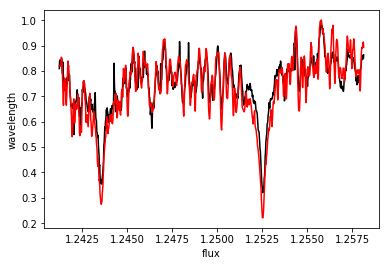

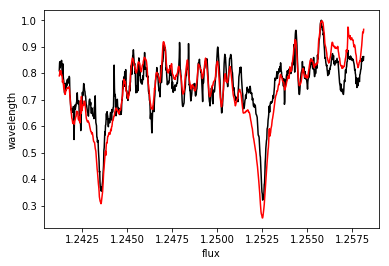

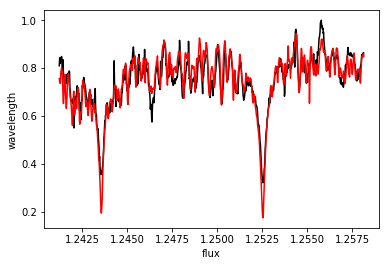

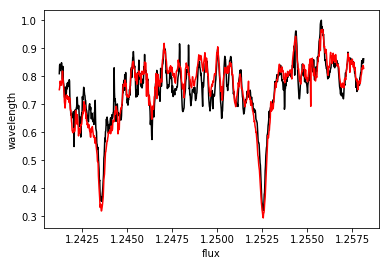

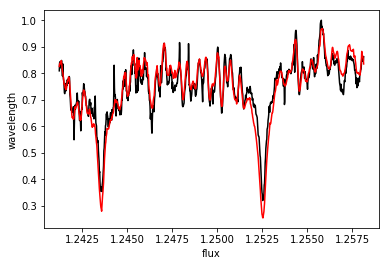

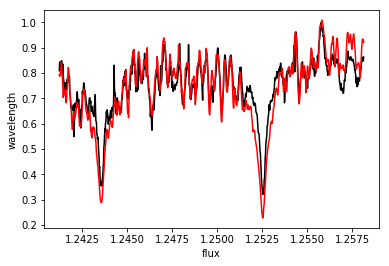

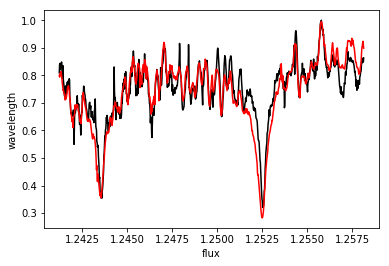

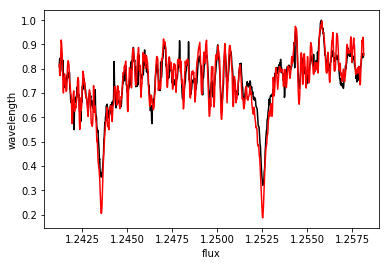

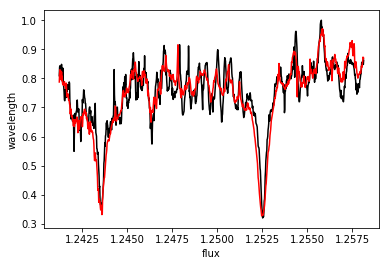

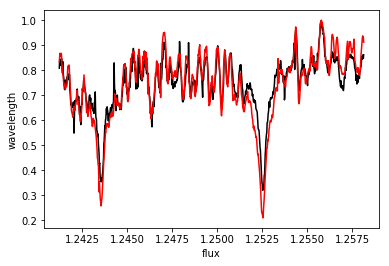

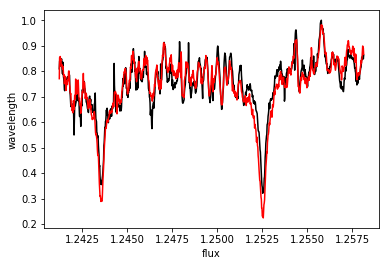

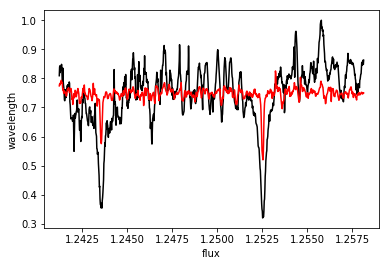

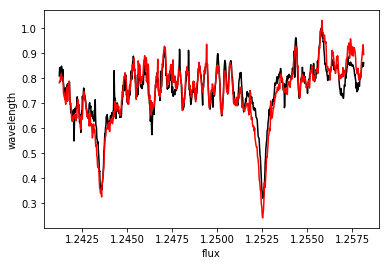

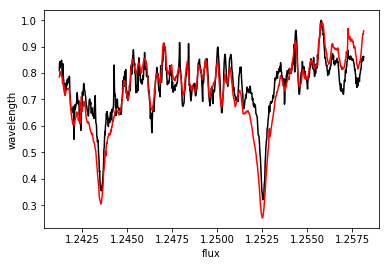

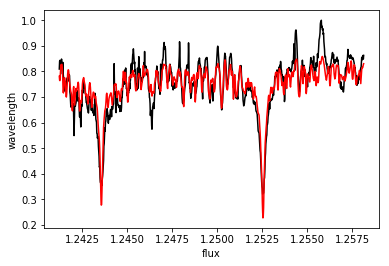

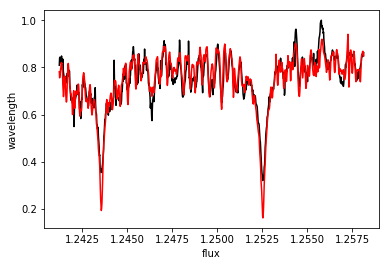

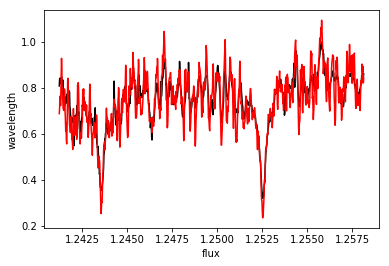

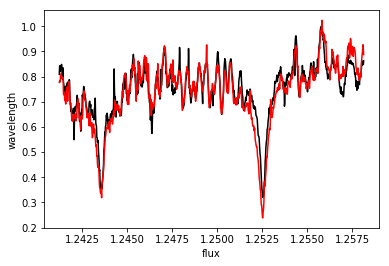

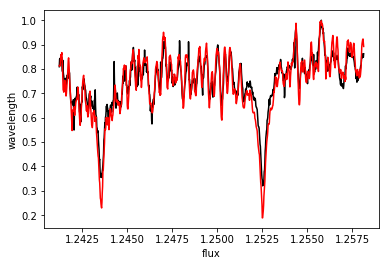

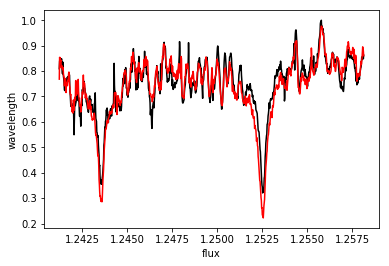

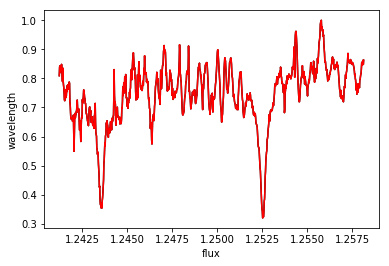

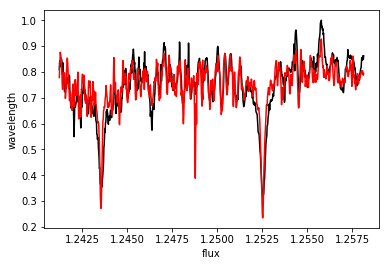

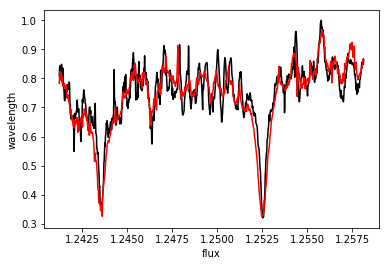

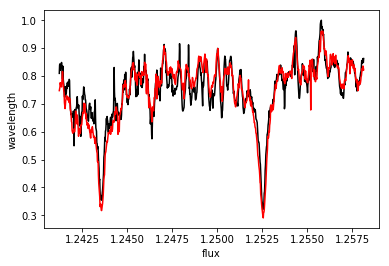

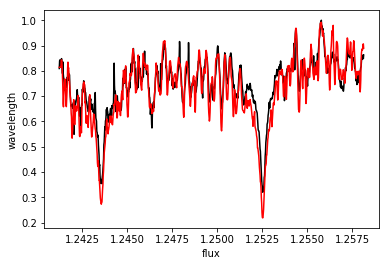

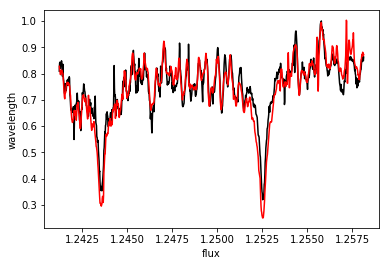

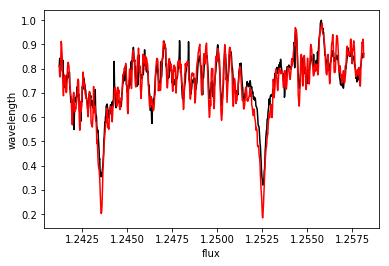

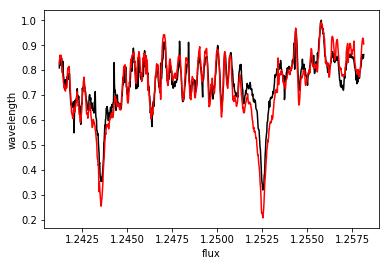

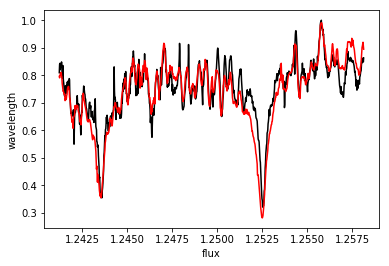

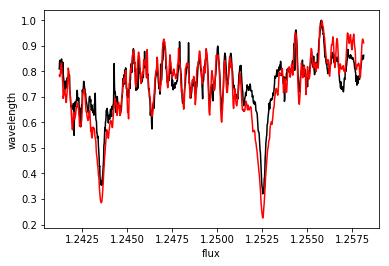

In [13]:
yfcq(334, 61, "/Users/victoriaditomasso/phys767/comp_sample_order_61_bad_removed.txt")

In [ ]:
yfcq(98, 61, "/Users/victoriaditomasso/Plotting_Spectra/comp_sample_order_61_badremoved.txt")

In [ ]:
plt.plot([1,2])
plt.savefig('test.png')
plt.close()

In [ ]:
help(mc_rms)

In [20]:
import astrodb
db = astrodb.Database('/Users/victoriaditomasso/Desktop/BDNYCdeprecated.db')

x = db.query("select spectra.wavelength, spectra.flux from spectra where spectra.id=3346")
print(x)

Database ready for use
[ ([ 1.22072005,  1.22073996,  1.22075999,  1.22077   ,  1.22079003,  1.22081006,  1.22082996,  1.22083998,  1.22086   ,  1.22088003,  1.22090006,  1.22090995,  1.22092998,  1.22095001,  1.22097003,  1.22098005,  1.22099996,  1.22101998,  1.22104001,  1.22105002,  1.22107005,  1.22108996,  1.22110999,  1.22112   ,  1.22114003,  1.22116005,  1.22117996,  1.22118998,  1.22121   ,  1.22123003,  1.22125006,  1.22125995,  1.22127998,  1.22130001,  1.22132003,  1.22133005,  1.22134995,  1.22136998,  1.22139001,  1.22141004,  1.22142005,  1.22143996,  1.22145998,  1.22148001,  1.22149003,  1.22151005,  1.22152996,  1.22154999,  1.22156   ,  1.22158003,  1.22160006,  1.22161996,  1.22162998,  1.22165   ,  1.22167003,  1.22169006,  1.22169995,  1.22171998,  1.22174001,  1.22176003,  1.22177005,  1.22178996,  1.22180998,  1.22183001,  1.22184002,  1.22186005,  1.22187996,  1.22189999,  1.22191   ,  1.22193003,  1.22195005,  1.22196996,  1.22197998,  1.222     ,  1.22202003

In [21]:
# Sorts the dataframe by RMS
import pandas

df=pd.read_csv('/Users/victoriaditomasso/phys767/MCSpectra/0045+1634_RMS_bad_removed.txt',sep='\t')

sorted_df = df.sort('RMS')

sorted_df.to_csv('0045+1634_RMS_bad_removed_sorted.txt',sep='\t')

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.interpolate import interp1d
# import BDdb
import astrodb
import pandas as pd
%matplotlib inline
import matplotlib.mlab as mlab
from scipy.stats import norm

def vis_rms_results(tar_source_id, spec_order, path_to_sorted_dataframe):
    
# Get target data
    w_tar,f_tar,rv_tar,unc_tar = get_tar_data(tar_source_id, spec_order)

# Shift target wavelength according to its RV
    w_tar = (w_tar) * (1.-(rv_tar/2.99792458e5))
    
# Read in the dataframe
    df=pd.read_csv(path_to_sorted_dataframe,sep='\t')
    
# Sets the first and last flux point that will be used in quantification calculation/will be plotted
    f=50
    l=1000

    fig = plt.gcf()
    plt.figure(figsize=(7,75))
    
    # Iterates through all of the comparison objects in the dataframe
    for i, row in df.iterrows() :
         
# Queries the database for comparison object data
        data_comp = db.query("select spectra.wavelength, spectra.flux, spectra.unc from spectra where spectra.id={}".format(row['spec_id']))

# Separates the comparison data into separate variables (wavelength, flux, RV, uncertainty)
        w_comp = np.asarray(data_comp[0][0])
        f_comp = np.asarray(data_comp[0][1])
        rv_comp = row['rv']
        unc_comp = data_comp[0][2]
    
# Will convert an SNR array to an uncertainty array
        unc_comp = snr_to_unc(unc_comp)
    
# Shifts spectra based on their RVs
        w_comp = w_comp * (1.-(rv_comp/2.99792458e5))
    
# Interpolates comparison spectrum and comparison unc
# Remember: once you interpolate, you need to plot the w_tar vs the interpolated flux NOT w_comp vs interpolated flux
        f_comp = np.interp(w_tar, w_comp, f_comp)
        unc_comp = np.interp(w_tar, w_comp, unc_comp)
    
# Normalizes the comparison spectrum to the target spectrum
        f_comp = normalize_spectra(f_tar,unc_tar,f_comp,unc_comp)

        f_tar_plot = f_tar[f:l] + i
        f_comp_plot = f_comp[f:l] + i
        w_tar_plot = w_tar[f:l]
        w_comp_plot = w_comp[f:l]
        unc_tar_plot = unc_tar[f:l]
        unc_tar_plot = unc_comp[f:l]
        
        plt.plot(w_tar_plot,f_tar_plot,color='black')
        plt.plot(w_tar_plot,f_comp_plot,color='red')
        
    plt.show()

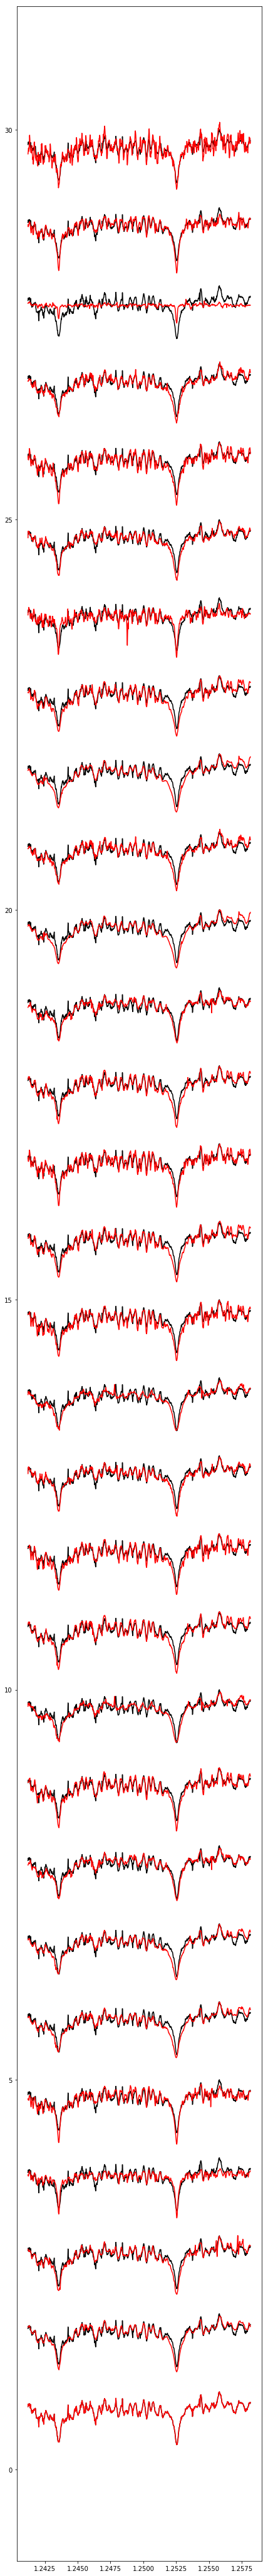

In [38]:
# Doesn't look accurate for 0045
vis_rms_results(334,61,'/Users/victoriaditomasso/phys767/MCSpectra/0045+1634_RMS_bad_removed_sorted.txt')